<a href="https://colab.research.google.com/github/huynhspm/Machine_Learning/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!git clone https://github.com/huynhspm/Machine_Learning

Cloning into 'Machine_Learning'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 3), reused 29 (delta 3), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [ ]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [23]:
# Load data
data = pd.read_csv('/content/Machine_Learning/Linear Regression/Linear_Regression.csv')

print(data.head(5))

# convert DataFrame to Numpy
data = data.values

   Diện tích      Giá
0    30.0000  448.524
1    32.4138  509.248
2    34.8276  535.104
3    37.2414  551.432
4    39.6552  623.418


In [24]:
N, d = data.shape
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

print(x.shape, y.shape)

(30, 1) (30, 1)


Text(0, 0.5, 'Giá')

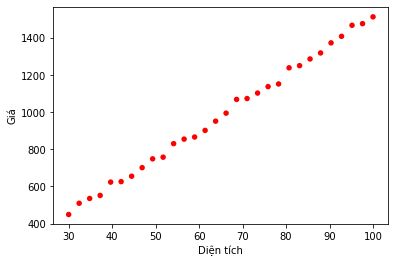

In [25]:
# plot data by scatter
plt.scatter(x, y, c='red', edgecolors='none', s=30)
plt.xlabel('Diện tích')
plt.ylabel('Giá')

In [26]:
# predict
def predict(x, w):
    return np.dot(x, w)

# calculate gradient
def grad(x, y_predict, y):
    N = y.shape[0]
    return np.dot(x.T, (y_predict - y)) / N

# calculate loss function
def loss(y_predict, y):
    N = y.shape[0]
    error = (y_predict - y) ** 2
    return np.sum(error) / (2 * N)

# rmse loss
def RMSELoss(y_predict, y):
    N = y.shape[0]
    rmse = np.sum((y_predict - y) ** 2)
    rmse = np.sqrt(rmse / N)
    return rmse

In [27]:
# Add a column-bias (full 1) to x
X = np.concatenate((np.ones((N, 1)), x), axis = 1)

# initial value of parameter 
w = np.random.randn(2, 1)

print(X.shape)
print(w.shape)

(30, 2)
(2, 1)


In [28]:
# number of iteration of gradient descent
numOfIteration = 20
cost = []
rmseLoss = []
learning_rate = 0.00004

for i in range(0, numOfIteration):
    
	# calculate predicted value
    y_predict = predict(X, w)

    cost.append(loss(y_predict, y))
    rmseLoss.append(RMSELoss(y_predict, y))    
    # Apply gradient descent
    w = w - learning_rate * grad(X, y_predict, y)

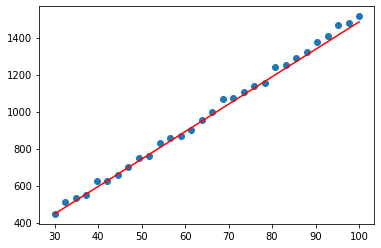

In [29]:
# Plot fitting line
y_predict = predict(X, w)

plt.scatter(x, y)
plt.plot(x, y_predict, c='r')

Text(0, 0.5, 'loss')

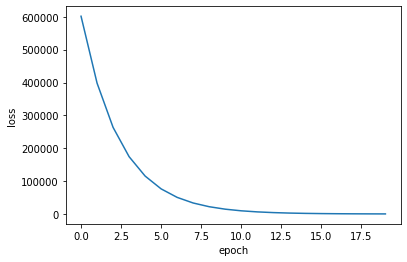

In [30]:
# plot loss function over iterators
plt.plot(cost)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'rmseLoss')

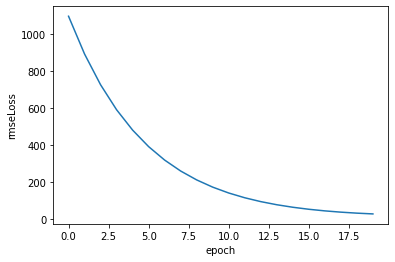

In [31]:
# plot RMSEloss function over iterators
plt.plot(rmseLoss)
plt.xlabel('epoch')
plt.ylabel('rmseLoss')